# Entrega 1 - Damas chinas

### Grupo 6:
     - Guillermo Aguirre  C.I. 4817028-5
     - Bruno González C.I. 4815697-6
     - Mauricio Irace C.I. 4924714-6


## 1. Objetivo

El objetivo de esta tarea es construir un jugador de damas chinas utilizando Python. 

El éxito del aprendizaje se mide a través del aumento en el porcentaje de partidas ganadas a medida que el número de partidas jugadas de entrenamiento crece. Para entrenarlo utilizaremos, en principio, un jugador que no sabe jugar (hace jugadas aleatorias) pero sería interesante también enfrentar nuestro jugador contra otro que aprenda de diferente forma o contra jugadores humanos reales. 


## 2. Diseño

   
## 2.1 Juego
- Sólo hay dos jugadores por partida, el que entrenamos y el rival. Esto es una simplificación ya que, originalmente, se puede jugar con hasta 6 jugadores. 
- Limitamos la cantidad de movimientos que pueden darse en una partida en 300 por jugador. De esta forma evitamos partidas con movimientos infinitos, que pueden darse, por ejemplo si uno de los dos jugadores mantiene al menos una ficha en su zona y no la saca nunca. En este caso lo podríamos haber dado ganador al jugador que no dejó sacar las fichas al otro ya que normalmente no la puede sacar debido a velocidad en la que llena el tablero el jugador opuesto. En caso de alcanzar este máximo la partida termina empatada. Para llegar a un número razonable utilizamos el ensayo y error. Consideramos que si una partida no se resolvió en 300 jugadas por bando entonces no se va a resolver.  


## 2.2 Tablero
- El tablero es el original de las damas chinas, como el de la siguiente imagen:
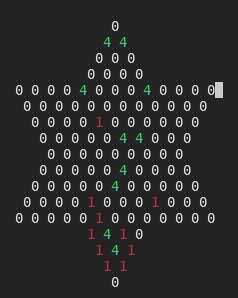
Para representar las fichas de los jugadores utilizamos números (por ejemplo 1 para el rojo y 4 para el jugador verde). Los espacios que no tienen fichas se representan con ceros. Como sólo hay 2 jugadores tenemos fichas rojas y verdes, todo el resto de los espacios del tablero están libres (no hay fichas de otro color). Al tener forma de estrella y por la simplicidad de representarlo con un cuadrado, los espacios que no quedan en la estrella los representamos con -1 (aunque no se muestran en las impresiones del tablero).

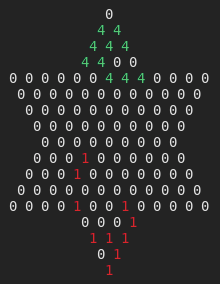
             
Para valorar una posición en un tablero se consideran los siguientes atributos: 
- Cantidad de fichas propias en la zona rival. De esta forma indicamos la importancia de cumplir el objetivo final del juego que es poner todas las fichas en la zona del rival. 
- Cantidad de fichas rivales en la zona propia. De esta forma indicamos que un tablero en el que el oponente tiene muchas fichas en nuestra zona es poco conveniente. 
- Una noción de distancia que es la sumatoria de las distancias de las fichas propias a la zona rival. El objetivo de la utilización de este atributo es promover el acercamiento de las fichas a la zona del rival. 
- Una noción de distancia que es la sumatoria de las distancias de las fichas rivales a la zona propia. Analogamente queremos valorar negativamente el acercamiento de las fichas del rival a nuestra zona. 

Inicialmente habiamos elegido dos atributos más, los cuales eran el salto más largo que podía hacer cada jugador. Luego de unos resultados experimantales negativos, llegamos a la conclusión de que estos atribtuos se veían opacados por el atributo de la distancia total, ya que el salto más largo hacia adelante es el que más reduce la distancia a la zona objetivo. Luego de sacarlo dichos parámetros no notamos un decrecimiento en la efectividad del algoritmo, validando nuestra hipótesis.

```python
    def as_vector(board, color):
    me = board.players[color]
    oponent = board.players[oponent_color(color)]
    my_positions = { marble.position for marble in me.marbles }
    opononet_positions = { marble.position for marble in oponent.marbles }
    in_target = len(me.target & my_positions)
    oponent_in_target = len(oponent.target & opononet_positions)
    my_total_distance_to_zone = 0
    for marble in me.marbles:
        my_total_distance_to_zone += marble.distance_to_zone()
    op_total_distance_to_zone = 0
    for marble in oponent.marbles:
        op_total_distance_to_zone += marble.distance_to_zone()

    return (in_target, oponent_in_target, my_total_distance_to_zone, op_total_distance_to_zone)

```
- Ejemplos de algunos tableros y el valor de los atributos elegidos.
Referencia: (Fichas en zona rival, fichas del rival en mi zona, distancia de mis fichas a la zona rival, distancia fichas rivales a mi zona)

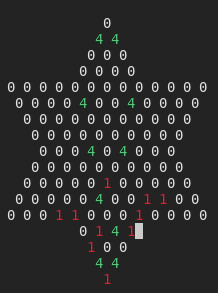

(3, 0, 80.45224805970658, 130.35828442860824)

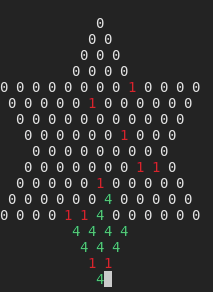
(8, 0, 31.565710457660494, 104.95025971894322)



## 2.3 Algoritmo
Para representar a la función de valoración elegimos utlizar una función lineal, cuyos atributos son los previamente mencionados. Cada atributo tiene asociado un peso, que durante el entrenamiento se va a ir ajustando para mejorar la efectividad de la función. Este ajuste tiene lugar en cada turno.   

```
def learning_function(self, args):
        in_target = args[0]
        oponent_in_target = args[1]
        my_total_distance_to_zone = args[2]
        op_total_distance_to_zone = args[3]

        if in_target == 10:
            return 1000
        elif oponent_in_target == 10:
            return -1000

        w0, w1, w2, w3, w4 = self.weights
        
        result = w0 + w1*in_target + w2*oponent_in_target +  w3*my_total_distance_to_zone + w4*op_total_distance_to_zone
        return result
```

El algoritmo utilizado para ajustar lso pesos fue el de LMS/Minimos cuadrados visto en el curso, ajustando los pesos en cada turno. Se probó a posteriori ajustar los pesos despues de cada partida, empeorando los resultados (mayores errores, sin mejorar con el tiempo).


Se usó una tasa de aprendizaje $\alpha$ entre 0 y 1 para mantener controlado los pesos (cuanto mayor tasa, mas rápido se ajustan los pesos). Fue necesario probar con valores variados de la misma. En principio, empezamos con 1, pero resultó, como era lógico, demasiado volátil. Tras esto, fuimos bajando de a decenas (0.1, 0.01) hasta que encontramos que el valor que mejor se ajustaba era 0.00000001. 



## 2.4 Contrarios
- Se implementó un jugador contrario que realiza movimientos random, es decir, se elige de forma aleatoria la ficha a mover y luego el movimiento final a partir de un set de movimientos posibles para la ficha elegida, también de forma aleatoria. 

- Se tomó luego los pesos del jugador entrenado anteriormente contra el oponente aleatorio, y se usó como contrincante en sí, entrenando contra el mismo. En este caso, y de igual forma que contra el rival aleatorio, solo el jugador 'principal' se entrenó, dejandolo al otro congelado en el tiempo.



## 3. Experimentación

## 3.1 Entrenamiento
Obtuvimos los resultados de las diferentes partidas jugadas (cantidad de ganadas, empatadas y perdidas). Esto lo realizamos tanto durante el entrenamiento como durante las partidas "oficiales". La razón de este experimento es determinar si el entrenamiento es efectivo y nuestro jugador lo hace cada vez mejor. 

Se efectuó un entrenamiento de 500 partidas con cada rival.

Se variaron tanto los valores del rate de aprendizaje como los pesos iniciales obteniendo resultados diferentes. 

- Primer entrenamiento.

Con rate 0.000001, y pesos iniciales $ W_0 = (1, 5, -5, -1, 0.1) $ se llego a:

$$ W_f = (1.0127787058828595, 5.044315514363959, -4.99883074835984, 0.055961557286021646, 1.643397896014473) $$

El problema con estos pesos finales, es que el valor de $w_3 > 0$, es decir, no busca acercarse a la zona objetivo, lo cual claramente fuerza un empate (pues no sale de su zona).

Por esta razón estos parámetros inicales se descartaron y se decidió utilizar un rate más bajo para que los pesos variaran más suavemente. 

- Segundo entrenamiento.

Por otro lado, usando los pesos iniciales $W_0' = (1, 5, -5, -5, 0.5)$ y peso $1 \times 10^{-7} $, resultados de aumentar la importancia inicial de moverse a la zona contraria, y de reducir la tasa de aprendizaje, obtuvimos mejores resultados:

```
####### RANDOM #######
FINAL WEIGHTS: [1.0007527530526446, 5.002700604838168, -4.999940205388994, -4.939582748619246, 0.5908794495012145]
WON: 115/500
TIED: 385/500
LOST: 0/500
######################
######### LAST #########
FINAL WEIGHTS: [1.006242044202283, 5.0233875752443575, -4.97680697865877, -4.512247513789265, 0.9638332492351976]
WON: 195/500
TIED: 35/500
LOST: 270/500
########################
TOTAL TIME: 0:31:01.058536
MAX_PLAYS: 105
RATE: 1e-07
INITIAL WEIGHTS: [1, 5, -5, -5, 0.5]

```

La cantidad de empates en el primer caso, se debe en gran medida a que el random no llegaba a sacar las fichas por lo que quedaba alguna ficha en su zona y nuestro jugador no podía colocar las 10.

Los  gráficos de los errores promedios por partida, en función de las mismas, son los siguientes:

#### Contra aleatorio
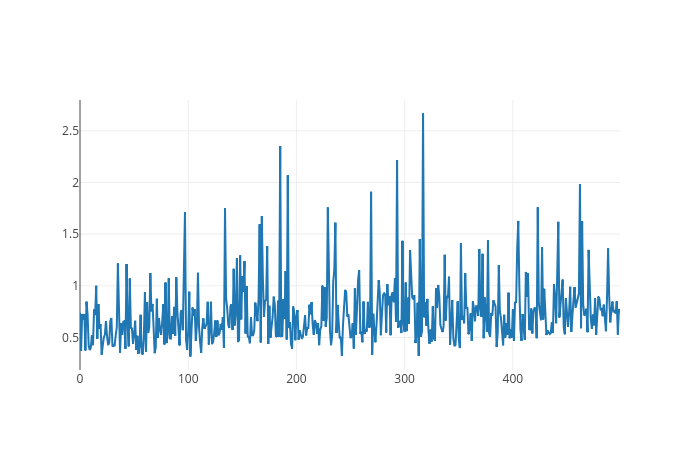
A pesar de las oscilaciones, se ve que los errores se mantienen acotados en la misma franja, posiblemente.
#### Contra el último aprendido
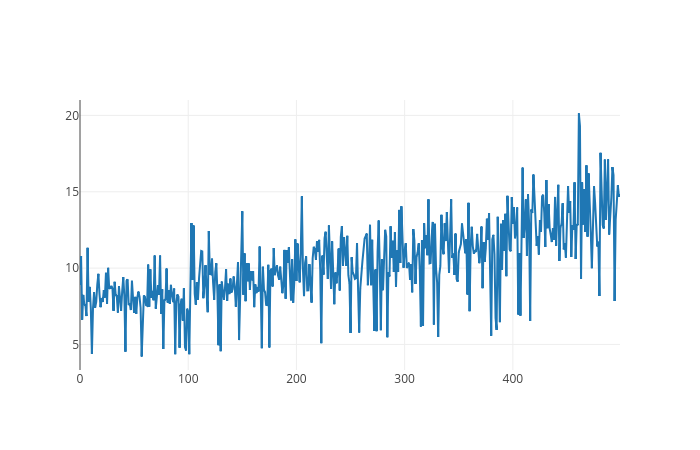
Se ve en este caso un valle en 100 (aproximadamente). Creemos retrospectivamente, que haber parado en esta cantidad de partidas podría haber mejorado los resultados en este caso

## 3.2 Partidas oficiales, ninguno de los jugadores aprende mientras juega

Se corrió un enfrentamiento real, a 100 partidas, entre los jugadores obtenidos en el primer entrenamiento. Uno luego de entrenar contra aleatorio y con una versión previa (la última) del mismo.

Con los pesos: 

$$ W_{random} = (1.01007205538372, 5.035063074044873, -4.999361813390288, -2.1720181949510793, 1.517948936396876) $$
$$ W_{last} = (1.4633581646971454, 5.099717167948467, -4.4900951079200295, -0.000000000000001, 42.58645521845219) $$

Observar que en los pesos obtenidos luego de entrenar $w_3 > 0$, pero para que tuviera sentido el enfrentamiento decidimos dejarlo en un valor negativo pero muy cercano a 0. Una explicación informal de lo que sucede es que el entrenado último quiere acercarse a la zona rival pero de forma paulatina.  

```
####### RESULTS #######
WON: 23/100
TIED: 77/100
LOST: 0/100
######################
TOTAL TIME: 0:02:25.451188
MAX_PLAYS: 105
```

Los resultados se acercaron bastante a los que intuiamos que iba a pasar; el jugador entrenado con random ganó o empató todas las partidas. El jugador que se obtuvo después de la segunda parte del entrenamiento no ganó ninguna vez. La explicación de este resultado es que en muchas partidas el último jugador no llegó a sacar todas las fichas de su zona (estas terminaron empatadas, se terminaron al alcanzar el máximo de jugadas) y en el resto (23) llegó a sacarlas pero no a llenar la zona del rival antes de que el jugador entrenado con random llenara la suya propia. 


Luego ejecutamos otro enfrentamiento real con los jugadores obtenidos del segundo entrenamiento. En este caso los pesos de los jugadores obtenidos después del entrenamiento no fueron modificados.

$$ W_{random} = (1.0007527530526446, 5.002700604838168, -4.999940205388994, -4.939582748619246, 0.5908794495012145) $$
$$ W_{last} = (1.006242044202283, 5.0233875752443575, -4.97680697865877, -4.512247513789265, 0.9638332492351976) $$

Los resultados fueron inesperados dado que el último jugador obtenido no ganó ni una sola partida al que sólo entrenó con random: 

```
####### RESULTS #######
WON: 30/100 
TIED: 70/100
LOST: 0/100
######################
TOTAL TIME: 0:04:16.406125
MAX_PLAYS: 300

```

Las partidas marcadas como WON, fueron gandas por por el jugador con pesos $ W_{random} $. Es decir, el jugador entrenado con versiones previas, no obtuvo tan buenos resultados como el que aprendió del aleatorio.


## 4. Conclusión

De lo anterior, vemos mejores resultados en el jugador que aprendió en base al aleatorio. Creemos que algunos parámetros podrían haber influido en esto, que no era lo esperado. El hecho de aprender contra el mismo rival en el segundo caso, en vez de mejorar al mismo con lo entrenado, pudo haber evitado una convergencia a un mejor valor de los pesos. 

No logramos llegar a los resultados que hubieramos deseado o intuido que debería pasar. Un jugador más entrenado no necesariamente juega mejor que uno menos entrenado. Para mejorar esto podríamos evaluar los atributos utilizados para evaluar los diferentes tableros, los parámetros utilizados y también el uso de técnicas más avanzadas como enfriamiento. 

Otra cosa a tener en cuenta es la forma de entrenamiento, que es totalmente indirecta, tal vez hubiera sido conveniente que en algunas situaciones se requiriera la intervención externa de un usuario experto que indicara al jugador lo que debería hacer. 

